In [1]:
## zheng he ban
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d
import csv
import glob
import os
import pandas as pd
from scipy.signal import lfilter, savgol_filter
%matplotlib inline




In [2]:
## interpolation and smoothing
# shi: smoothing window size
def SG_fil(data,shi=91,order=2):
    df = data.copy()
    column_name = df.columns.tolist()
    df_new = pd.DataFrame(columns=column_name)
    for n in column_name:
        df_new[n] = savgol_filter(df.loc[:,n],shi,order)
    return df_new   

def interpolate_pupil(data, shi=20):
    data['LeftPupilD'][data['LeftPupilD']<0] = np.nan
    data['RightPupilD'][data['RightPupilD']<0] = np.nan
    data = data.interpolate(method='linear',axis=0,limit_direction ='both')
    data.dropna(axis=0)
    # data_m = moving_fil(data,shi)
    data_s = SG_fil(data,shi+1,2)
    return data_s

## formal inpout data
path_data = 'D:/Tianyu/code/python/paper5_markov/UI/data/'
data_collection = ['LeftPupilD','RightPupilD','Lumin']
data=[]
print(os.listdir(path_data))
for file_path in os.listdir(path_data):
    t=pd.read_csv(path_data+file_path,index_col=0)
    t = interpolate_pupil(t[data_collection])
    t.index = range(len(t))
    t.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
    data.append(t[data_collection])

## pupil lumim function
def left_adjust(coeff_left,x,power):
    if power == 2:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2) + coeff_left[3] * np.power(x,power-3) + coeff_left[4] * np.power(x,power-4) + coeff_left[5] * np.power(x,power-5)
    return y
def right_adjust(coeff_right,x,power):
    if power == 2:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2) + coeff_right[3] * np.power(x,power-3) + coeff_right[4] * np.power(x,power-4) + coeff_right[5] * np.power(x,power-5)
    return y

# for test, choose which file
data_index = 0
# start frame
start = 200
# end frame
end = len(data[data_index][['Lumin']].values)-200
# lumin times adjustion
multi_lumin = 255

# equation matching
x_lumin = data[data_index][['Lumin']][start:end].values.ravel()*multi_lumin
left_original_pupil = data[data_index][['LeftPupilD']][start:end].values.ravel()
right_original_pupil = data[data_index][['RightPupilD']][start:end].values.ravel()
power_coeff = 2
coeff_left = polyfit(x_lumin, left_original_pupil, power_coeff)
coeff_right = polyfit(x_lumin, right_original_pupil, power_coeff)
left_adjust_pupil = left_adjust(coeff_left,x_lumin,power_coeff).ravel()
right_adjust_pupil = right_adjust(coeff_right,x_lumin,power_coeff).ravel()
left_cogload = left_original_pupil - left_adjust_pupil
right_cogload = right_original_pupil - right_adjust_pupil

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/Tianyu/code/python/paper5_markov/UI/data/'

In [4]:
## formal inpout data

def interpolate_pupil(data, shi=20):
    data['LeftPupilD'][data['LeftPupilD']<0] = np.nan
    data['RightPupilD'][data['RightPupilD']<0] = np.nan
    data = data.interpolate(method='linear',axis=0,limit_direction ='both')
    data.dropna(axis=0)
    # data_m = moving_fil(data,shi)
    data_s = SG_fil(data,shi+1,2)
    return data_s

def SG_fil(data,shi=91,order=2):
    df = data.copy()
    column_name = df.columns.tolist()
    df_new = pd.DataFrame(columns=column_name)
    for n in column_name:
        df_new[n] = savgol_filter(df.loc[:,n],shi,order)
    return df_new   


path_data = './TestData/'
data_collection = ['LeftPupilD','RightPupilD','Lumin']
data=[]
print(os.listdir(path_data))
for file_path in os.listdir(path_data):
    t=pd.read_csv(path_data+file_path,index_col=0)
    t = interpolate_pupil(t[data_collection])
    t.index = range(len(t))
    t.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
    data.append(t[data_collection])

['P02_1_Easy_05_HMD637618548348018799_1.csv', 'P02_1_Easy_10_HMD637618553501865629_2.csv', 'P02_1_Easy_15_HMD637618559322581515_3.csv', 'P02_2_Hard_05_HMD637618565258045178_1.csv', 'P02_2_Hard_10_HMD637618578508316418_2.csv', 'P02_2_Hard_15_HMD637618583010995067_3.csv', 'P02_3_Easy_05_HMD637618591776604248_1.csv', 'P02_3_Easy_10_HMD637618596819201873_2.csv', 'P02_3_Easy_15_HMD637618605451263003_3.csv', 'P02_4_Hard_05_HMD637618612565682531_1.csv', 'P02_4_Hard_10_HMD637618617486820957_2.csv', 'P02_4_Hard_15_HMD637618623140113650_3.csv']


D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
D:\apps\Anaconda\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=T

In [7]:
print(data[0])

       LeftPupilD  RightPupilD     Lumin
0       -0.070791    -0.075895  0.000000
1        0.031856     0.034153  0.000000
2        0.135125     0.144866  0.000000
3        0.239014     0.256246  0.000000
4        0.343524     0.368291  0.000000
...           ...          ...       ...
30869    3.901651     3.844230  0.291853
30870    3.913750     3.855149  0.291871
30871    3.925388     3.866184  0.292018
30872    3.936568     3.877336  0.292293
30873    3.947288     3.888603  0.292697

[30874 rows x 3 columns]


In [10]:
startPoints = pd.read_csv('startpoints.csv')
print(startPoints)
print(startPoints.iloc[[0]].bsStart )
print(startPoints.iloc[[0]].bsEnd )

     Participant  Block  condition  Trial  bsStart   bsEnd
0              2      1          1      1   1827.0  2669.0
1              2      1          1      2   1465.0  2264.0
2              2      1          1      3   1699.0  2876.0
3              2      2          2      1   1377.0  2547.0
4              2      2          2      2    533.0  1554.0
..           ...    ...        ...    ...      ...     ...
211           23      3          2      2   1021.0  2075.0
212           23      3          2      3   2241.0  3283.0
213           23      4          1      1   2156.0  3236.0
214           23      4          1      2   2764.0  3313.0
215           23      4          1      3   1465.0  2530.0

[216 rows x 6 columns]
0    1827.0
Name: bsStart, dtype: float64
0    2669.0
Name: bsEnd, dtype: float64


In [12]:
## pupil lumim function
def left_adjust(coeff_left,x,power):
    if power == 2:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2) + coeff_left[3] * np.power(x,power-3) + coeff_left[4] * np.power(x,power-4) + coeff_left[5] * np.power(x,power-5)
    return y
def right_adjust(coeff_right,x,power):
    if power == 2:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2) + coeff_right[3] * np.power(x,power-3) + coeff_right[4] * np.power(x,power-4) + coeff_right[5] * np.power(x,power-5)
    return y

# for test, choose which file
data_index = 0
# start frame
start = int(startPoints.iloc[[data_index]].bsStart)
# end frame
end = int(startPoints.iloc[[data_index]].bsEnd)
# lumin times adjustion
multi_lumin = 255

# equation matching
x_lumin = data[data_index][['Lumin']][start:end].values.ravel()*multi_lumin
left_original_pupil = data[data_index][['LeftPupilD']][start:end].values.ravel()
right_original_pupil = data[data_index][['RightPupilD']][start:end].values.ravel()
power_coeff = 2
coeff_left = polyfit(x_lumin, left_original_pupil, power_coeff)
coeff_right = polyfit(x_lumin, right_original_pupil, power_coeff)
left_adjust_pupil = left_adjust(coeff_left,x_lumin,power_coeff).ravel()
right_adjust_pupil = right_adjust(coeff_right,x_lumin,power_coeff).ravel()
left_cogload = left_original_pupil - left_adjust_pupil
right_cogload = right_original_pupil - right_adjust_pupil

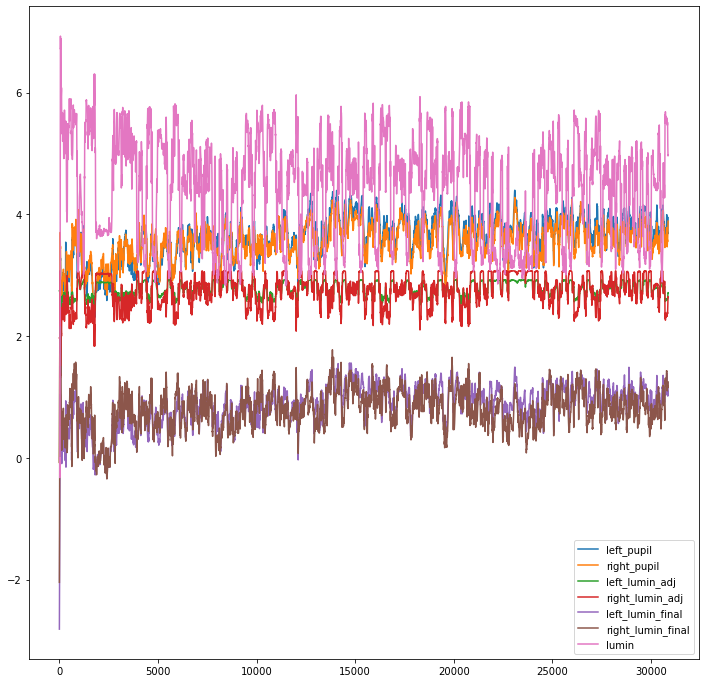

In [26]:
x_lumin = data[data_index][['Lumin']].values.ravel()*multi_lumin
left_original_pupil = data[data_index][['LeftPupilD']].values.ravel()
right_original_pupil = data[data_index][['RightPupilD']].values.ravel()
left_adjust_pupil = left_adjust(coeff_left,x_lumin,power_coeff).ravel()
right_adjust_pupil = right_adjust(coeff_right,x_lumin,power_coeff).ravel()
left_cogload = left_original_pupil - left_adjust_pupil
right_cogload = right_original_pupil - right_adjust_pupil

plt.figure(figsize=(12, 12))
plt.plot(left_original_pupil, label='left_pupil')
plt.plot(right_original_pupil, label='right_pupil')
plt.plot(left_adjust_pupil, label='left_lumin_adj')
plt.plot(right_adjust_pupil, label='right_lumin_adj')
plt.plot(left_cogload, label='left_lumin_final')
plt.plot(right_cogload, label='right_lumin_final')
plt.plot(x_lumin/15, label='lumin')

plt.legend()
plt.show()

In [20]:
print(coeff_left,coeff_right)
# print(left_cogload)

[-1.52002764e-04  1.09178472e-02  2.74458223e+00] [-5.23198604e-04  4.80548891e-02  1.96976377e+00]


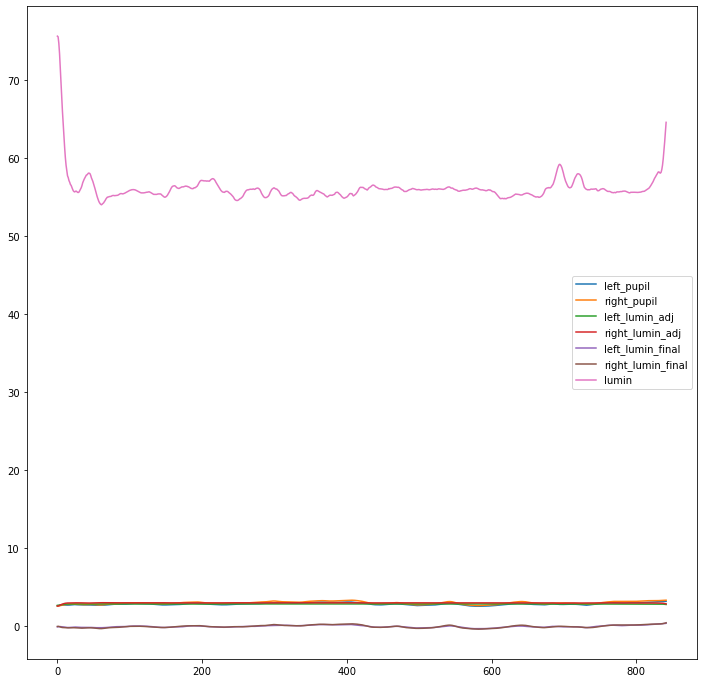

In [21]:

plt.figure(figsize=(12, 12))
plt.plot(left_original_pupil, label='left_pupil')
plt.plot(right_original_pupil, label='right_pupil')
plt.plot(left_adjust_pupil, label='left_lumin_adj')
plt.plot(right_adjust_pupil, label='right_lumin_adj')
plt.plot(left_cogload, label='left_lumin_final')
plt.plot(right_cogload, label='right_lumin_final')
plt.plot(x_lumin, label='lumin')

plt.legend()
plt.show()

In [ ]:
# read start and end point 

for file_path in os.listdir(path_data):
    t=pd.read_csv(path_data+file_path,index_col=0)
    t = interpolate_pupil(t[data_collection])
    t.index = range(len(t))
    t.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
    data.append(t[data_collection])

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d
import csv
import glob
import os
import pandas as pd
from scipy.signal import lfilter, savgol_filter
%matplotlib inline


In [3]:
## interpolation and smoothing
# shi: smoothing window size
def moving_fil(data, shi=100, method='wa', print_ans=False):
    df = data.copy()
    column_name = df.columns.tolist()
    df_new = pd.DataFrame(columns=column_name)
    for n in column_name:
        if method == 'ewa':
            df_new[n] = df.loc[:, n].ewm(span=shi).mean()
        elif method == 'wa':
            df_new[n] = df.loc[:, n].rolling(window=shi, min_periods=1).mean()
    return df_new

def SG_fil(data,shi=91,order=2):
    df = data.copy()
    column_name = df.columns.tolist()
    df_new = pd.DataFrame(columns=column_name)
    for n in column_name:
        df_new[n] = savgol_filter(df.loc[:,n],shi,order)
    return df_new   

def interpolate_pupil(data, shi=20):
    data['LeftPupilD'][data['LeftPupilD']<0] = np.nan
    data['RightPupilD'][data['RightPupilD']<0] = np.nan
    data = data.interpolate(method='linear',axis=0,limit_direction ='both')
    data.dropna(axis=0)
    # data_m = moving_fil(data,shi)
    data_s = SG_fil(data,shi+1,2)
    return data_s

In [13]:
## formal inpout data
path_data = 'D:/Tianyu/code/python/paper5_markov/UI/data/'
data_collection = ['LeftPupilD','RightPupilD','Lumin']
data=[]
print(os.listdir(path_data))
for file_path in os.listdir(path_data):
    t=pd.read_csv(path_data+file_path,index_col=0)
    t = interpolate_pupil(t[data_collection])
    t.index = range(len(t))
    t.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
    data.append(t[data_collection])


['black_think_HMD.csv', 'black_white_HMD.csv', 'test1018_HMD.csv']


D:\Tianyu\software\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
D:\Tianyu\software\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
D:\Tianyu\software\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s

In [5]:
## pupil lumim function
def left_adjust(coeff_left,x,power):
    if power == 2:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_left[0] * np.power(x,power) + coeff_left[1] * np.power(x,power-1) + coeff_left[2] * np.power(x,power-2) + coeff_left[3] * np.power(x,power-3) + coeff_left[4] * np.power(x,power-4) + coeff_left[5] * np.power(x,power-5)
    return y
def right_adjust(coeff_right,x,power):
    if power == 2:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2)
    if power == 5:
        y = coeff_right[0] * np.power(x,power) + coeff_right[1] * np.power(x,power-1) + coeff_right[2] * np.power(x,power-2) + coeff_right[3] * np.power(x,power-3) + coeff_right[4] * np.power(x,power-4) + coeff_right[5] * np.power(x,power-5)
    return y


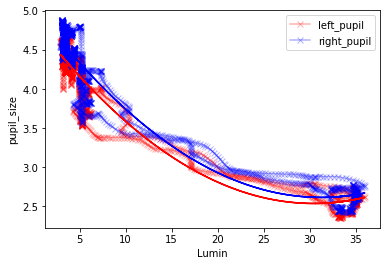

[ 2.52023698e-03 -1.53182328e-01  4.86556856e+00]
[ 2.50544091e-03 -1.56393294e-01  5.05585498e+00]


In [6]:
# for test, choose which file
data_index = 2
# start frame
start = 200
# end frame
end = len(data[data_index][['Lumin']].values)-200
# lumin times adjustion
multi_lumin = 255

# plot original data
plt.plot(data[data_index][['Lumin']][start:end].values*multi_lumin, data[data_index][['LeftPupilD']][start:end].values, label='left_pupil', c='r',marker='x', alpha=0.3)
plt.plot(data[data_index][['Lumin']][start:end].values*multi_lumin, data[data_index][['RightPupilD']][start:end].values, label='right_pupil', c='b',marker='x', alpha=0.3)

# equation matching
x = data[data_index][['Lumin']][start:end].values.ravel()*multi_lumin
left_y = data[data_index][['LeftPupilD']][start:end].values.ravel()
right_y = data[data_index][['RightPupilD']][start:end].values.ravel()
power_coeff = 2
coeff_left = polyfit(x, left_y, power_coeff)
coeff_right = polyfit(x, right_y, power_coeff)
# plot equation
if power_coeff == 2:
    plt.plot(x, coeff_left[0] * np.power(x,power_coeff) + coeff_left[1] * np.power(x,power_coeff-1) + coeff_left[2] * np.power(x,power_coeff-2), 'r-')
    plt.plot(x, coeff_right[0] * np.power(x,power_coeff) + coeff_right[1] * np.power(x,power_coeff-1) + coeff_right[2] * np.power(x,power_coeff-2), 'b-')
if power_coeff == 5:
    plt.plot(x, coeff_left[0] * np.power(x,power_coeff) + coeff_left[1] * np.power(x,power_coeff-1) + coeff_left[2] * np.power(x,power_coeff-2) + coeff_left[3] * np.power(x,power_coeff-3) + coeff_left[4] * np.power(x,power_coeff-4) + coeff_left[5] * np.power(x,power_coeff-5), 'k-')
    plt.plot(x, coeff_right[0] * np.power(x,power_coeff) + coeff_right[1] * np.power(x,power_coeff-1) + coeff_right[2] * np.power(x,power_coeff-2) + coeff_right[3] * np.power(x,power_coeff-3) + coeff_right[4] * np.power(x,power_coeff-4) + coeff_right[5] * np.power(x,power_coeff-5), 'k-')
plt.xlabel("Lumin")
plt.ylabel("pupil_size")
plt.legend()
plt.show()
print(coeff_left)
print(coeff_right)


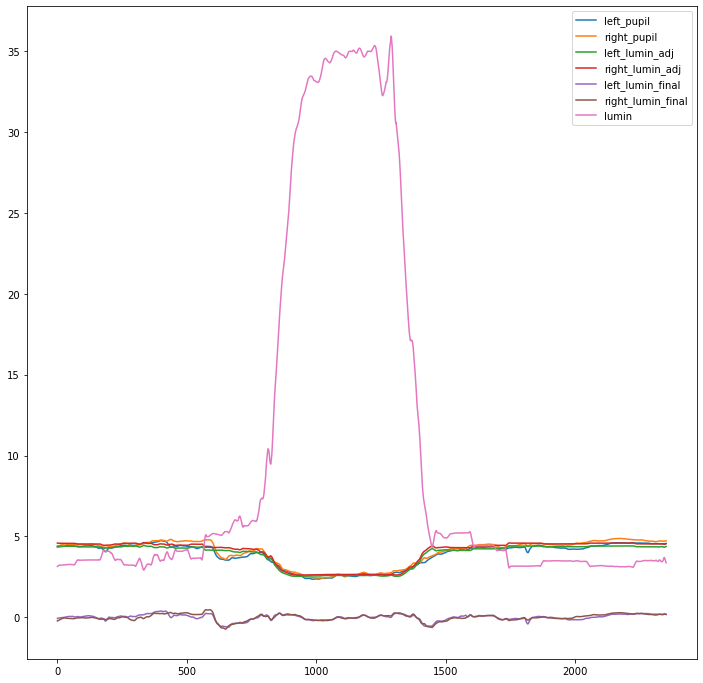

In [12]:

x_lumin = data[data_index][['Lumin']][start:end].values.ravel()*multi_lumin
left_original_pupil = np.array(data[data_index][['LeftPupilD']][start:end]).ravel()
right_original_pupil = np.array(data[data_index][['RightPupilD']][start:end]).ravel()
left_adjust_pupil = left_adjust(coeff_left,x_lumin,power_coeff).ravel()
right_adjust_pupil = right_adjust(coeff_right,x_lumin,power_coeff).ravel()
left_cogload = np.array(data[data_index][['LeftPupilD']][start:end]).ravel() - left_adjust_pupil
right_cogload = np.array(data[data_index][['RightPupilD']][start:end]).ravel() - right_adjust_pupil
plt.figure(figsize=(12, 12))
plt.plot(left_original_pupil, label='left_pupil')
plt.plot(right_original_pupil, label='right_pupil')
plt.plot(left_adjust_pupil, label='left_lumin_adj')
plt.plot(right_adjust_pupil, label='right_lumin_adj')
plt.plot(left_cogload, label='left_lumin_final')
plt.plot(right_cogload, label='right_lumin_final')
# plt.plot(x_lumin, label='lumin')

plt.legend()
plt.show()